# Prediction of Future Closing Stock Prices with Machine Learning v1.1

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## Part 1.1: Predict JFC stocks from 3/5/18 up to the present day then compare with latest      WSJ Data 

Since Google Finance data is not currently updated, we could get data from Wall Street Journal. Instead of using an API, we have to download csv files from the website.
Download csv file of JFC prices from 2013-1-1 up to the latest.

Source: http://quotes.wsj.com/PH/XPHS/JFC/historical-prices

Import data as a Pandas dataframe.

In [2]:
stock = pd.read_csv('JFC_WSJ.csv')

Inspect dataframe.

In [3]:
stock.columns

Index(['Date', ' Open', ' High', ' Low', ' Close', ' Volume'], dtype='object')

## Data Cleaning 

Remove spaces from column names by renaming them.

In [4]:
stock.rename(columns=lambda x: x.strip(), inplace=True)
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Inspect the data types of each column, then the first 5 and last 5 rows of the dataframe.

In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 6 columns):
Date      1276 non-null object
Open      1276 non-null float64
High      1276 non-null float64
Low       1276 non-null float64
Close     1276 non-null float64
Volume    1276 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 59.9+ KB


In [6]:
stock.head()

Date   Open   High    Low  Close  Volume
0  03/28/18  295.0  299.0  292.0  299.0  759390
1  03/27/18  295.0  297.0  289.4  294.4  356420
2  03/26/18  286.6  295.0  282.0  295.0  404650
3  03/23/18  285.0  288.0  280.0  288.0  864870
4  03/22/18  285.4  288.0  282.4  286.8  573890

In [7]:
stock.tail()

Date   Open   High    Low  Close  Volume
1271  01/08/13  107.1  107.7  107.1  107.3  389530
1272  01/07/13  107.5  107.5  106.7  107.0  719780
1273  01/04/13  107.0  107.6  107.0  107.6  548040
1274  01/03/13  104.8  107.5  104.8  107.2  684290
1275  01/02/13  102.0  104.5  102.0  104.2  125900

Find nan values. Replace them with -999999 if there are present.

In [8]:
stock.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

No NaN values!!!
However, we have to rearrange the data from descending to ascending order.

In [9]:
stock = stock.reindex(index=stock.index[::-1]).reset_index(drop=True)

In [10]:
stock.head()

Date   Open   High    Low  Close  Volume
0  01/02/13  102.0  104.5  102.0  104.2  125900
1  01/03/13  104.8  107.5  104.8  107.2  684290
2  01/04/13  107.0  107.6  107.0  107.6  548040
3  01/07/13  107.5  107.5  106.7  107.0  719780
4  01/08/13  107.1  107.7  107.1  107.3  389530

In [11]:
stock.tail()

Date   Open   High    Low  Close  Volume
1271  03/22/18  285.4  288.0  282.4  286.8  573890
1272  03/23/18  285.0  288.0  280.0  288.0  864870
1273  03/26/18  286.6  295.0  282.0  295.0  404650
1274  03/27/18  295.0  297.0  289.4  294.4  356420
1275  03/28/18  295.0  299.0  292.0  299.0  759390

Convert 'Date' column as datetime objects and set it as index column.

In [12]:
stock['Date'] = pd.to_datetime(stock['Date'], infer_datetime_format=True)

In [13]:
stock.set_index('Date',inplace=True)

In [14]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1276 entries, 2013-01-02 to 2018-03-28
Data columns (total 5 columns):
Open      1276 non-null float64
High      1276 non-null float64
Low       1276 non-null float64
Close     1276 non-null float64
Volume    1276 non-null int64
dtypes: float64(4), int64(1)
memory usage: 59.8 KB


In [15]:
type(stock.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
stock.tail()

Open   High    Low  Close  Volume
Date                                          
2018-03-22  285.4  288.0  282.4  286.8  573890
2018-03-23  285.0  288.0  280.0  288.0  864870
2018-03-26  286.6  295.0  282.0  295.0  404650
2018-03-27  295.0  297.0  289.4  294.4  356420
2018-03-28  295.0  299.0  292.0  299.0  759390

## Add technical indicators 

In [17]:
stock['HL_PCT'] = (stock['High'] - stock['Close']) / stock['Close'] *100
stock['PCT_change'] = (stock['High'] - stock['Open']) / stock['Open'] *100
stock['cum_daily_return'] = (1 + stock['PCT_change']).cumsum()

In [18]:
stock.tail()

Open   High    Low  Close  Volume    HL_PCT  PCT_change  \
Date                                                                   
2018-03-22  285.4  288.0  282.4  286.8  573890  0.418410    0.911002   
2018-03-23  285.0  288.0  280.0  288.0  864870  0.000000    1.052632   
2018-03-26  286.6  295.0  282.0  295.0  404650  0.000000    2.930914   
2018-03-27  295.0  297.0  289.4  294.4  356420  0.883152    0.677966   
2018-03-28  295.0  299.0  292.0  299.0  759390  0.000000    1.355932   

            cum_daily_return  
Date                          
2018-03-22       2552.710118  
2018-03-23       2554.762750  
2018-03-26       2558.693664  
2018-03-27       2560.371630  
2018-03-28       2562.727562

Create Copy for exercise. The original will be used later.

In [19]:
stockC = stock.copy(deep=True)
stockC.tail(10)

Open   High    Low  Close   Volume    HL_PCT  PCT_change  \
Date                                                                    
2018-03-15  288.4  288.6  282.6  284.0  1140780  1.619718    0.069348   
2018-03-16  286.8  305.4  286.8  305.4  2052470  0.000000    6.485356   
2018-03-19  299.6  299.6  295.2  298.0   531280  0.536913    0.000000   
2018-03-20  296.8  296.8  285.0  286.0  1028940  3.776224    0.000000   
2018-03-21  286.6  293.0  285.0  285.0   953100  2.807018    2.233077   
2018-03-22  285.4  288.0  282.4  286.8   573890  0.418410    0.911002   
2018-03-23  285.0  288.0  280.0  288.0   864870  0.000000    1.052632   
2018-03-26  286.6  295.0  282.0  295.0   404650  0.000000    2.930914   
2018-03-27  295.0  297.0  289.4  294.4   356420  0.883152    0.677966   
2018-03-28  295.0  299.0  292.0  299.0   759390  0.000000    1.355932   

            cum_daily_return  
Date                          
2018-03-15       2538.080683  
2018-03-16       2545.566039  
2018-03-19       2546.566039  
2018-03-20       2547.566039  
2018-03-21       2550.799116  
2018-03-22       2552.710118  
2018-03-23       2554.762750  
2018-03-26       2558.693664  
2018-03-27       2560.371630  
2018-03-28       2562.727562

Notice that there are no values for 03-03 and 03-04. Trading days exclude weekends and holidays.

Add Prediction column which contains the predicted Close column value n trading days later.

We'll try to predict the 'Close' values from 03-05 up to the latest day available.

In [20]:
day_start = stockC.index.get_loc(pd.Timestamp('2018-03-05'))
day_start

1258

In [21]:
day_end = len(stockC.index)
day_end

1276

In [22]:
n = day_end-day_start
n

18

## Add Prediction Column 

We'll add a 'Prediction column' that contains the actual closing values n days later.

In [23]:
stockC['Prediction'] = stockC['Close'].shift(-n)
stockC.tail(n+1)

Open   High    Low  Close   Volume    HL_PCT  PCT_change  \
Date                                                                    
2018-03-02  297.6  298.4  295.0  298.0   735080  0.134228    0.268817   
2018-03-05  299.0  300.0  296.0  299.6   388840  0.133511    0.334448   
2018-03-06  300.0  304.0  297.8  298.6   833460  1.808439    1.333333   
2018-03-07  300.0  304.0  299.8  304.0   853340  0.000000    1.333333   
2018-03-08  303.0  304.0  295.0  295.0   367970  3.050847    0.330033   
2018-03-09  297.0  297.0  292.0  292.0   352590  1.712329    0.000000   
2018-03-12  296.0  299.0  292.2  295.4   303520  1.218687    1.013514   
2018-03-13  296.0  297.0  292.4  293.0   557650  1.365188    0.337838   
2018-03-14  293.0  294.4  287.4  288.4   757340  2.080444    0.477816   
2018-03-15  288.4  288.6  282.6  284.0  1140780  1.619718    0.069348   
2018-03-16  286.8  305.4  286.8  305.4  2052470  0.000000    6.485356   
2018-03-19  299.6  299.6  295.2  298.0   531280  0.536913    0.000000   
2018-03-20  296.8  296.8  285.0  286.0  1028940  3.776224    0.000000   
2018-03-21  286.6  293.0  285.0  285.0   953100  2.807018    2.233077   
2018-03-22  285.4  288.0  282.4  286.8   573890  0.418410    0.911002   
2018-03-23  285.0  288.0  280.0  288.0   864870  0.000000    1.052632   
2018-03-26  286.6  295.0  282.0  295.0   404650  0.000000    2.930914   
2018-03-27  295.0  297.0  289.4  294.4   356420  0.883152    0.677966   
2018-03-28  295.0  299.0  292.0  299.0   759390  0.000000    1.355932   

            cum_daily_return  Prediction  
Date                                      
2018-03-02       2523.851020       299.0  
2018-03-05       2525.185468         NaN  
2018-03-06       2527.518802         NaN  
2018-03-07       2529.852135         NaN  
2018-03-08       2531.182168         NaN  
2018-03-09       2532.182168         NaN  
2018-03-12       2534.195681         NaN  
2018-03-13       2535.533519         NaN  
2018-03-14       2537.011335         NaN  
2018-03-15       2538.080683         NaN  
2018-03-16       2545.566039         NaN  
2018-03-19       2546.566039         NaN  
2018-03-20       2547.566039         NaN  
2018-03-21       2550.799116         NaN  
2018-03-22       2552.710118         NaN  
2018-03-23       2554.762750         NaN  
2018-03-26       2558.693664         NaN  
2018-03-27       2560.371630         NaN  
2018-03-28       2562.727562         NaN

Notice that...

The predicted value in 2018-03-02, 299.0,

In [24]:
stockC['Prediction'].index[-n-1]

Timestamp('2018-03-02 00:00:00')

In [25]:
stockC['Prediction'][stockC['Prediction'].index[-n-1]]

299.0

Is the same as the closing price in 2018-03-28.

In [26]:
stockC['Close'].index[-1]

Timestamp('2018-03-28 00:00:00')

In [27]:
stockC['Close'][stockC['Close'].index[-1]]

299.0

## Preprocessing 

The dataset would be divided as X and y; with X as... and y as...

In order to prepare the data for machine learning, we have to preprocess the X in order to...

In [28]:
from sklearn import preprocessing

In [29]:
X = preprocessing.scale(stockC.drop(['Prediction'], axis=1))

X would be split into two..;X would be the data before...

X_predict would be the data after... and would be used later to predict the future closing values.

In [30]:
X_predict = X[-n:]
X = X[:-n]

In [31]:
y = stockC['Prediction'][:-n]

In [32]:
print(type(X), type(X_predict), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [33]:
print(len(X), len(X_predict), len(y))

1258 18 1258


## Train Test Split 

Both X and y would be split into two; train set and test set. 

Train set would be used to train the computer while the test set would be used to compare and evaluate the predictions of the computer.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.2))

In [36]:
print(type(X_train), type(X_test), type(y_train), type(y_test) )

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [37]:
print(len(X_train), len(X_test), len(y_train), len(y_test) )

1006 252 1006 252


## Try with Linear Regression 

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
accuracy = lm.score(X_test, y_test)
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 92.62020210900758%


## Try with SVR with Cross Validation Score

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

lm = SVR(kernel='linear', C=1)
scores = cross_val_score(lm, X, y, cv=5)
scores #score for each split

array([0.85431111, 0.75576601, 0.21582376, 0.51204383, 0.79215736])

In [41]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.63 (+/- 0.47)


## Linear Regression after Cross Validation Score

In [42]:
lm.fit(X_train, y_train)
accuracy = lm.score(X_test, y_test)
print('Accuracy: '+str(accuracy*100)+'%')

Accuracy: 92.57155036050294%


Text(0,0.5,'Predicted Y')

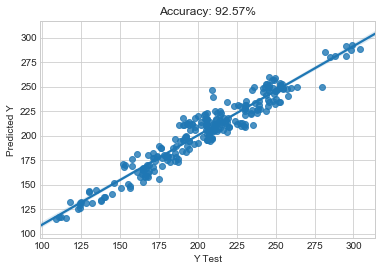

In [43]:
predictions = lm.predict(X_test)
sns.regplot(y_test,predictions)
plt.title('Accuracy: '+str((accuracy*100).round(2))+'%')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

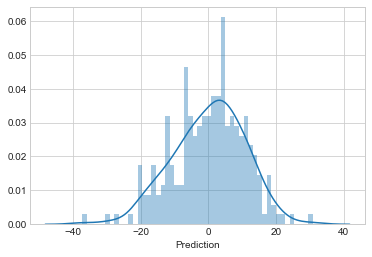

In [44]:
sns.distplot((y_test-predictions),bins=50)

## Try with other regressors, while producing subplots for each regressor evaluation and predicting closing stock prices at the same time

C:\Users\LLagman\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


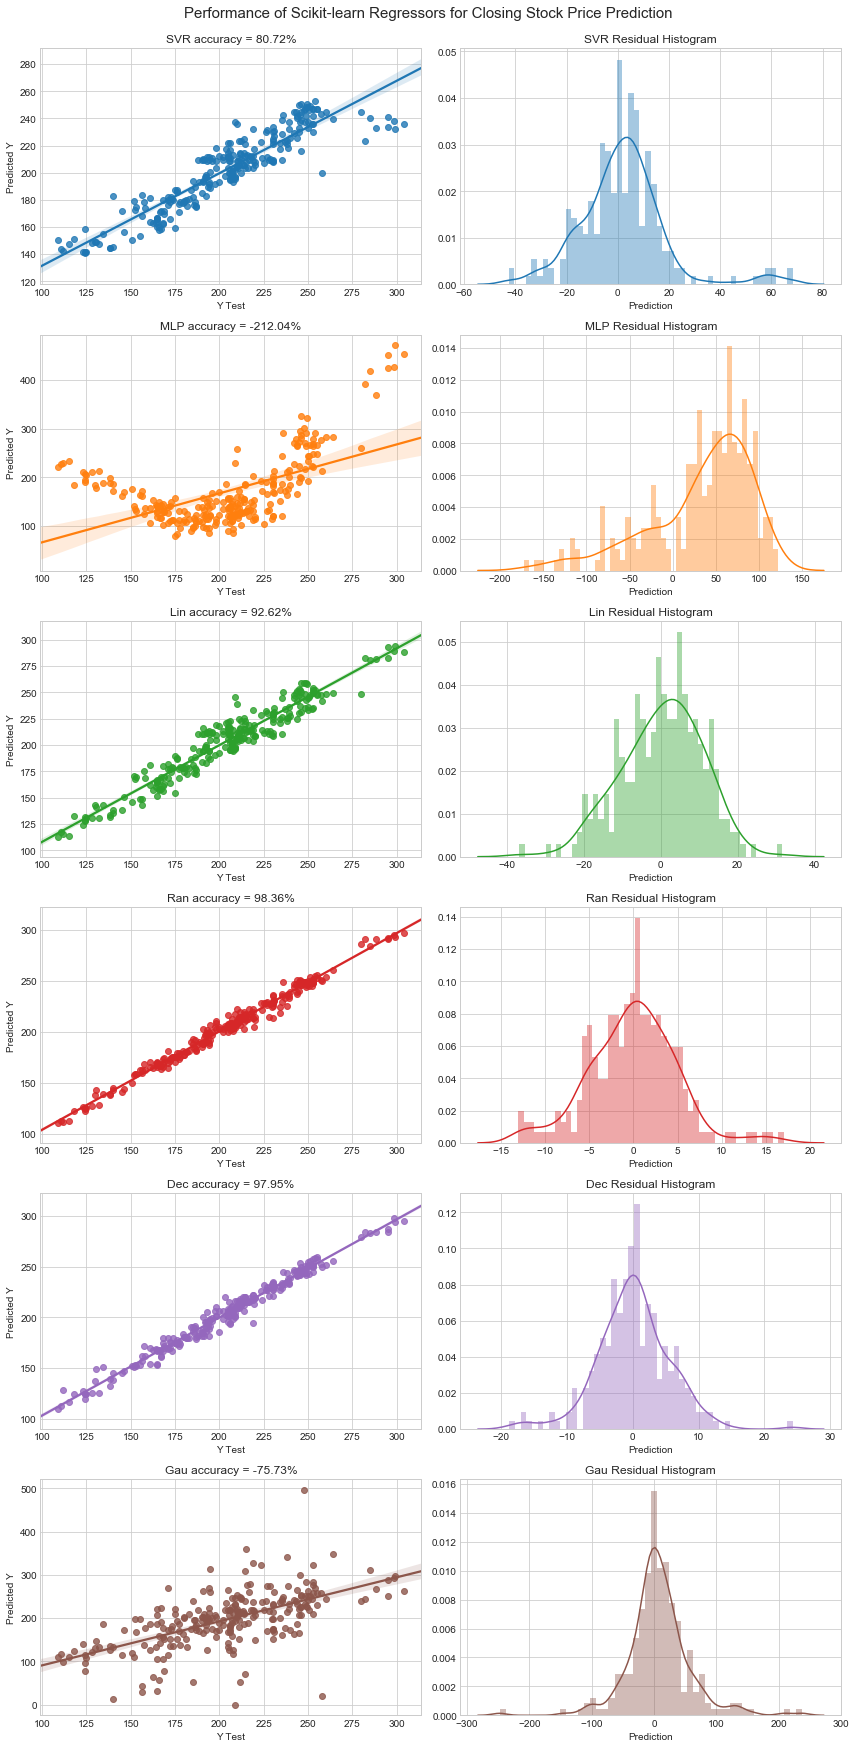

In [45]:
from sklearn import preprocessing#, cross_validation
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor as NNR
from sklearn.linear_model import LinearRegression as LRR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.gaussian_process import GaussianProcessRegressor as GPR

predictors = [SVR(), NNR(), LRR(), RFR(), DTR(), GPR()]

forecast = []
pred_cols = []
accuracy = []

fig, ax = plt.subplots(6,2, figsize=(12,24))

for pred, color, i in zip(predictors, sns.color_palette(), range(len(predictors))):
    pred.fit(X_train, y_train)
    accu = pred.score(X_test,y_test)
    predictions = pred.predict(X_test)
            
    sns.regplot(y_test,predictions, color=color, ax=ax[i,0])
    ax[i,0].set_title('{0} accuracy = {1:.2f}'.format(str(pred)[:3], (accu*100).round(2))+'%')
    ax[i,0].set_xlabel('Y Test')
    ax[i,0].set_ylabel('Predicted Y')
    
    sns.distplot((y_test-predictions), bins=50, color=color, ax=ax[i,1])
    ax[i,1].set_title('{0} Residual Histogram'.format(str(pred)[:3]))
    
    forecast.append(pred.predict(X_predict))
    pred_cols.append(str(pred)[:3])
    accuracy.append('{0} accuracy = {1:.2f}'.format(str(pred)[:3], (accu*100).round(2))+'%')
    
fig.suptitle('Performance of Scikit-learn Regressors for Closing Stock Price Prediction', fontsize=15, y=1.01)
fig.tight_layout()

##  Crete new datfrme for plotting forecasted values per regressor

### Forecast: Data for columns

In [46]:
np.array(forecast).shape

(6, 18)

In [47]:
np.array(forecast)

array([[229.18641592, 230.38894742, 228.72268401, 219.42787128,
        230.10603478, 232.92558619, 234.76028428, 234.98336203,
        236.98555382, 198.79970702, 230.55645436, 216.56011875,
        227.30779568, 242.86026912, 241.47875377, 227.5070568 ,
        234.83640059, 233.20060214],
       [473.79207113, 446.2121502 , 474.32328195, 441.02111078,
        446.07272497, 441.06561504, 446.8200715 , 424.53391191,
        421.47428772, 405.59547891, 473.80003539, 414.04121107,
        380.9392605 , 421.16114983, 424.22784243, 410.64916096,
        445.99579507, 456.43347667],
       [294.4526925 , 294.65394508, 299.2589447 , 290.05244374,
        288.19015044, 290.73158641, 289.50050569, 285.53591743,
        282.34324614, 299.74299478, 293.28824301, 282.89254304,
        283.89650748, 284.03536631, 284.54373956, 289.08168065,
        289.6009669 , 294.24429784],
       [294.56      , 292.92      , 292.28      , 297.18      ,
        296.9       , 295.5       , 293.76      , 293.24 

In [48]:
forecast_T = np.array(forecast).transpose()
forecast_T

array([[229.18641592, 473.79207113, 294.4526925 , 294.56      ,
        294.4       , 283.39701358],
       [230.38894742, 446.2121502 , 294.65394508, 292.92      ,
        294.4       , 261.37614267],
       [228.72268401, 474.32328195, 299.2589447 , 292.28      ,
        294.4       , 256.79082989],
       [219.42787128, 441.02111078, 290.05244374, 297.18      ,
        294.4       , 234.30861049],
       [230.10603478, 446.07272497, 288.19015044, 296.9       ,
        288.        , 337.00464982],
       [232.92558619, 441.06561504, 290.73158641, 295.5       ,
        288.        , 290.10585105],
       [234.76028428, 446.8200715 , 289.50050569, 293.76      ,
        288.        , 301.86504599],
       [234.98336203, 424.53391191, 285.53591743, 293.24      ,
        288.        , 265.24747692],
       [236.98555382, 421.47428772, 282.34324614, 290.3       ,
        286.        , 260.0401376 ],
       [198.79970702, 405.59547891, 299.74299478, 289.56      ,
        286.8       ,  64.7

In [49]:
type(forecast_T)

numpy.ndarray

In [50]:
forecast_T.shape

(18, 6)

### Days from 3/5 up to the last day available: Index

In [51]:
len(stockC.index)

1276

In [52]:
stockC.index[-1]

Timestamp('2018-03-28 00:00:00')

In [53]:
Days=stockC.index[-n:len(stockC.index)]
Days

DatetimeIndex(['2018-03-05', '2018-03-06', '2018-03-07', '2018-03-08',
               '2018-03-09', '2018-03-12', '2018-03-13', '2018-03-14',
               '2018-03-15', '2018-03-16', '2018-03-19', '2018-03-20',
               '2018-03-21', '2018-03-22', '2018-03-23', '2018-03-26',
               '2018-03-27', '2018-03-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [54]:
range(len(stockC.index[-n:len(stockC.index)]))

range(0, 18)

### Accuracy: column names

In [55]:
type(accuracy)

list

In [56]:
accuracy

['SVR accuracy = 80.72%',
 'MLP accuracy = -212.04%',
 'Lin accuracy = 92.62%',
 'Ran accuracy = 98.36%',
 'Dec accuracy = 97.95%',
 'Gau accuracy = -75.73%']

### Combine to create new dataframe

In [57]:
regs_stockC = pd.DataFrame(data=forecast_T,
                    index=stockC.index[-n:len(stockC.index)],
                    columns=accuracy)
regs_stockC

SVR accuracy = 80.72%  MLP accuracy = -212.04%  \
Date                                                         
2018-03-05             229.186416               473.792071   
2018-03-06             230.388947               446.212150   
2018-03-07             228.722684               474.323282   
2018-03-08             219.427871               441.021111   
2018-03-09             230.106035               446.072725   
2018-03-12             232.925586               441.065615   
2018-03-13             234.760284               446.820071   
2018-03-14             234.983362               424.533912   
2018-03-15             236.985554               421.474288   
2018-03-16             198.799707               405.595479   
2018-03-19             230.556454               473.800035   
2018-03-20             216.560119               414.041211   
2018-03-21             227.307796               380.939261   
2018-03-22             242.860269               421.161150   
2018-03-23             241.478754               424.227842   
2018-03-26             227.507057               410.649161   
2018-03-27             234.836401               445.995795   
2018-03-28             233.200602               456.433477   

            Lin accuracy = 92.62%  Ran accuracy = 98.36%  \
Date                                                       
2018-03-05             294.452693                 294.56   
2018-03-06             294.653945                 292.92   
2018-03-07             299.258945                 292.28   
2018-03-08             290.052444                 297.18   
2018-03-09             288.190150                 296.90   
2018-03-12             290.731586                 295.50   
2018-03-13             289.500506                 293.76   
2018-03-14             285.535917                 293.24   
2018-03-15             282.343246                 290.30   
2018-03-16             299.742995                 289.56   
2018-03-19             293.288243                 294.36   
2018-03-20             282.892543                 291.88   
2018-03-21             283.896507                 286.48   
2018-03-22             284.035366                 291.48   
2018-03-23             284.543740                 290.58   
2018-03-26             289.081681                 288.50   
2018-03-27             289.600967                 293.82   
2018-03-28             294.244298                 291.64   

            Dec accuracy = 97.95%  Gau accuracy = -75.73%  
Date                                                       
2018-03-05                  294.4              283.397014  
2018-03-06                  294.4              261.376143  
2018-03-07                  294.4              256.790830  
2018-03-08                  294.4              234.308610  
2018-03-09                  288.0              337.004650  
2018-03-12                  288.0              290.105851  
2018-03-13                  288.0              301.865046  
2018-03-14                  288.0              265.247477  
2018-03-15                  286.0              260.040138  
2018-03-16                  286.8               64.790663  
2018-03-19                  294.4              292.555034  
2018-03-20                  285.0              198.476708  
2018-03-21                  285.0              309.934552  
2018-03-22                  286.0              375.324691  
2018-03-23                  286.8              311.882240  
2018-03-26                  286.8              300.447435  
2018-03-27                  288.0              341.272218  
2018-03-28                  286.8              317.918013

## Create another dataframe for the day of divergence from actual prices to forecasted values 

### Accuracy: column names 

In [58]:
accuracy

['SVR accuracy = 80.72%',
 'MLP accuracy = -212.04%',
 'Lin accuracy = 92.62%',
 'Ran accuracy = 98.36%',
 'Dec accuracy = 97.95%',
 'Gau accuracy = -75.73%']

### Actual Closing Price the trading day before the forecast: Data

In [59]:
print(stockC.index[-n-1])
print(stockC['Close'][-n-1])

2018-03-02 00:00:00
298.0


In [60]:
rowlink = []
for i in regs_stockC.columns:
    rowlink.append(stockC['Close'][-n-1])
np.array([rowlink])

array([[298., 298., 298., 298., 298., 298.]])

### 3/2: Index 

In [61]:
stockC.index[-n-1:-n]

DatetimeIndex(['2018-03-02'], dtype='datetime64[ns]', name='Date', freq=None)

### Combine 

In [62]:
link = pd.DataFrame(data=np.array([rowlink]), 
                    index=stockC.index[-n-1:-n],
                    columns=accuracy)
link

SVR accuracy = 80.72%  MLP accuracy = -212.04%  \
Date                                                         
2018-03-02                  298.0                    298.0   

            Lin accuracy = 92.62%  Ran accuracy = 98.36%  \
Date                                                       
2018-03-02                  298.0                  298.0   

            Dec accuracy = 97.95%  Gau accuracy = -75.73%  
Date                                                       
2018-03-02                  298.0                   298.0

# Merge the dataframes

In [63]:
#Do not delete this cell. You'll get the reason later.
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(seconds=10).total_seconds())
end=int(timedelta(seconds=14).total_seconds())

In [64]:
predic_stockC = pd.merge(link,regs_stockC, how='outer').set_index(stockC.index[-n-1:len(stockC.index)])
predic_stockC

SVR accuracy = 80.72%  MLP accuracy = -212.04%  \
Date                                                         
2018-03-02             298.000000               298.000000   
2018-03-05             229.186416               473.792071   
2018-03-06             230.388947               446.212150   
2018-03-07             228.722684               474.323282   
2018-03-08             219.427871               441.021111   
2018-03-09             230.106035               446.072725   
2018-03-12             232.925586               441.065615   
2018-03-13             234.760284               446.820071   
2018-03-14             234.983362               424.533912   
2018-03-15             236.985554               421.474288   
2018-03-16             198.799707               405.595479   
2018-03-19             230.556454               473.800035   
2018-03-20             216.560119               414.041211   
2018-03-21             227.307796               380.939261   
2018-03-22             242.860269               421.161150   
2018-03-23             241.478754               424.227842   
2018-03-26             227.507057               410.649161   
2018-03-27             234.836401               445.995795   
2018-03-28             233.200602               456.433477   

            Lin accuracy = 92.62%  Ran accuracy = 98.36%  \
Date                                                       
2018-03-02             298.000000                 298.00   
2018-03-05             294.452693                 294.56   
2018-03-06             294.653945                 292.92   
2018-03-07             299.258945                 292.28   
2018-03-08             290.052444                 297.18   
2018-03-09             288.190150                 296.90   
2018-03-12             290.731586                 295.50   
2018-03-13             289.500506                 293.76   
2018-03-14             285.535917                 293.24   
2018-03-15             282.343246                 290.30   
2018-03-16             299.742995                 289.56   
2018-03-19             293.288243                 294.36   
2018-03-20             282.892543                 291.88   
2018-03-21             283.896507                 286.48   
2018-03-22             284.035366                 291.48   
2018-03-23             284.543740                 290.58   
2018-03-26             289.081681                 288.50   
2018-03-27             289.600967                 293.82   
2018-03-28             294.244298                 291.64   

            Dec accuracy = 97.95%  Gau accuracy = -75.73%  
Date                                                       
2018-03-02                  298.0              298.000000  
2018-03-05                  294.4              283.397014  
2018-03-06                  294.4              261.376143  
2018-03-07                  294.4              256.790830  
2018-03-08                  294.4              234.308610  
2018-03-09                  288.0              337.004650  
2018-03-12                  288.0              290.105851  
2018-03-13                  288.0              301.865046  
2018-03-14                  288.0              265.247477  
2018-03-15                  286.0              260.040138  
2018-03-16                  286.8               64.790663  
2018-03-19                  294.4              292.555034  
2018-03-20                  285.0              198.476708  
2018-03-21                  285.0              309.934552  
2018-03-22                  286.0              375.324691  
2018-03-23                  286.8              311.882240  
2018-03-26                  286.8              300.447435  
2018-03-27                  288.0              341.272218  
2018-03-28                  286.8              317.918013

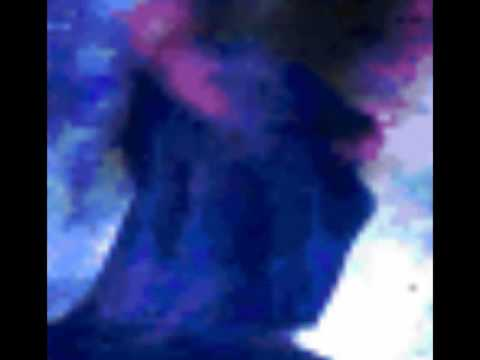

In [65]:
#See?
YouTubeVideo("VA41XQMUi-4", start=start, end=end, autoplay=1)

## Plot all Regressor Predictions 

In [66]:
label='JFC.PH'

Text(0,0.5,'Closing Price (₱)\n')

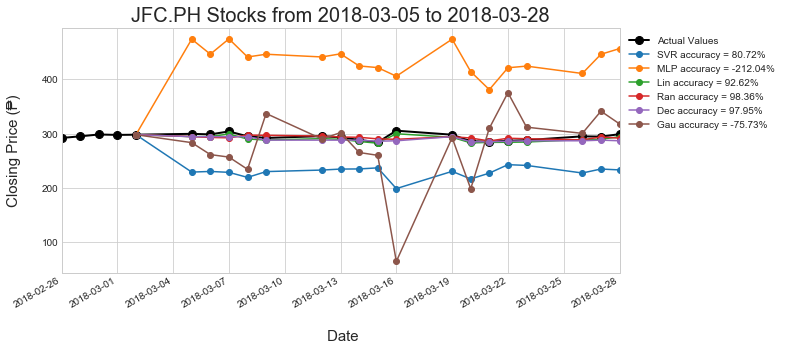

In [67]:
ax = stockC['Close'].plot(color='black', label='Actual Values', figsize=(10,5), lw=2,marker='o', markersize=8)
predic_stockC.plot(color=sns.color_palette(),marker='o', ax=ax)

plt.title('{0} Stocks from {1} to {2}'.format(label,str(predic_stockC.index[1])[0:10],str(predic_stockC.index[-1])[0:10]), fontsize=20)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.xlim(xmin=stockC.index[-n-5],xmax=stockC.index[-1])
plt.xlabel('\n Date', fontsize=15)
plt.ylabel('Closing Price (₱)\n', fontsize=15) 

### Remove Gau column for the next plot. 

In [68]:
predic_stockC.columns[0:-1].tolist()

['SVR accuracy = 80.72%',
 'MLP accuracy = -212.04%',
 'Lin accuracy = 92.62%',
 'Ran accuracy = 98.36%',
 'Dec accuracy = 97.95%']

In [69]:
sns.color_palette()[0:-1]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)]

Text(0,0.5,'Closing Price (₱)\n')

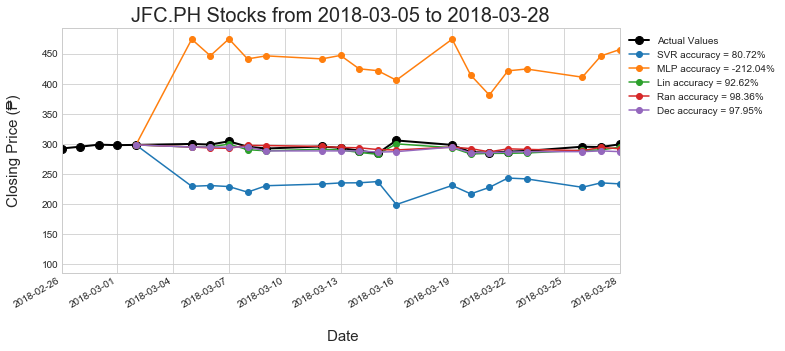

In [70]:
ax = stockC['Close'].plot(color='black', label='Actual Values', figsize=(10,5), lw=2, marker='o', markersize=8)
predic_stockC[predic_stockC.columns[0:-1].tolist()].plot(color=sns.color_palette()[0:-1], ax=ax, marker='o')

plt.title('{0} Stocks from {1} to {2}'.format(label,str(predic_stockC.index[1])[0:10],str(predic_stockC.index[-1])[0:10]), fontsize=20)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.xlim(xmin=stockC.index[-n-5],xmax=stockC.index[-1])
plt.xlabel('\n Date', fontsize=15)
plt.ylabel('Closing Price (₱)\n', fontsize=15) 

### Remove MLP

In [71]:
predic_stockC.columns[1]

'MLP accuracy = -212.04%'

In [72]:
predic_stockC.columns[2:-1]

Index(['Lin accuracy = 92.62%', 'Ran accuracy = 98.36%',
       'Dec accuracy = 97.95%'],
      dtype='object')

In [73]:
predic_stockC.columns[2:-1]

Index(['Lin accuracy = 92.62%', 'Ran accuracy = 98.36%',
       'Dec accuracy = 97.95%'],
      dtype='object')

In [74]:
[predic_stockC.columns[0]]

['SVR accuracy = 80.72%']

In [75]:
[predic_stockC.columns[0]]+predic_stockC.columns[2:5].tolist()

['SVR accuracy = 80.72%',
 'Lin accuracy = 92.62%',
 'Ran accuracy = 98.36%',
 'Dec accuracy = 97.95%']

In [76]:
[sns.color_palette()[0]]+sns.color_palette()[2:5]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)]

Text(0,0.5,'Closing Price (₱)\n')

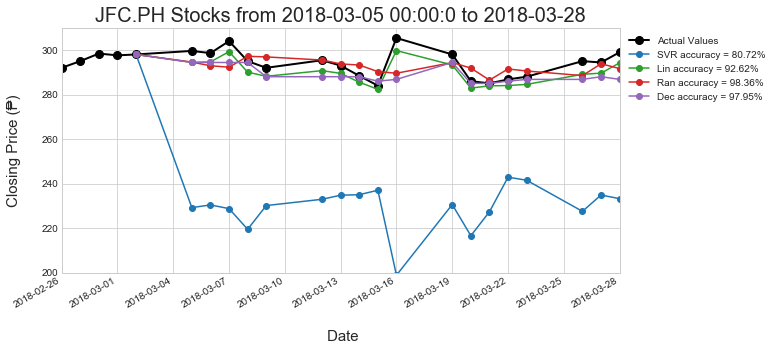

In [77]:
ax = stockC['Close'].plot(color='black', label='Actual Values', figsize=(10,5), lw=2, marker='o', markersize=8)
predic_stockC[[predic_stockC.columns[0]]+predic_stockC.columns[2:5].tolist()].plot(
    color=[sns.color_palette()[0]]+sns.color_palette()[2:5], ax=ax, marker='o')

plt.title('{0} Stocks from {1} to {2}'.format(label,str(predic_stockC.index[1])[0:n],str(predic_stockC.index[-1])[0:10]), fontsize=20)
plt.legend(loc='best',bbox_to_anchor=(1, 1))
plt.xlim(xmin=stockC.index[-n-5],xmax=stockC.index[-1])
plt.ylim(ymin=200, ymax=310)
plt.xlabel('\n Date', fontsize=15)
plt.ylabel('Closing Price (₱)\n', fontsize=15) 

## Plot Lin, Ran, Dec forecasts with Plotly 

Plotly allows us to create interactive plots so that we dont have to create a zoomed-in version of our regular plots. Hovering the cursor also removes the necessity of annotating daily stock prices. You could compare visually how close the predicted/forecasted prices are compared to the actual prices.

### Concat with actual closing values for final plotting dataframe 

In [78]:
pl_predic_stockC = pd.concat([stockC['Close'],predic_stockC],axis=1)
pl_predic_stockC.rename(columns={'Close': 'Actual Closing Prices'}, inplace=True)

In [79]:
pl_predic_stockC.columns

Index(['Actual Closing Prices', 'SVR accuracy = 80.72%',
       'MLP accuracy = -212.04%', 'Lin accuracy = 92.62%',
       'Ran accuracy = 98.36%', 'Dec accuracy = 97.95%',
       'Gau accuracy = -75.73%'],
      dtype='object')

Start up plotly. 

In [80]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [81]:
import cufflinks as cf

In [82]:
init_notebook_mode(connected=True)

In [83]:
cf.go_offline()

In [84]:
[pl_predic_stockC.columns[0]]

['Actual Closing Prices']

In [85]:
pl_predic_stockC.columns[3:-1]

Index(['Lin accuracy = 92.62%', 'Ran accuracy = 98.36%',
       'Dec accuracy = 97.95%'],
      dtype='object')

In [86]:
ideal_plots = [pl_predic_stockC.columns[0]]+pl_predic_stockC.columns[3:-1].tolist()
ideal_plots

['Actual Closing Prices',
 'Lin accuracy = 92.62%',
 'Ran accuracy = 98.36%',
 'Dec accuracy = 97.95%']

In [87]:
pl_predic_stockC[ideal_plots].iplot(mode='lines+markers', 
                                    title='{0} Stocks from {1} to {2}'.format(label, 
                                                                              str(pl_predic_stockC.index[-n])[0:10], 
                                                                              str(pl_predic_stockC.index[-1])[0:10]), 
                                    xTitle='\nDate', 
                                    yTitle='Closing Price (₱)\n')

# Part 1.2: Predict JFC stocks 10 days later

Every previous steps would be the same except for creating the index for future days. We have to remove the holidays that fall on weekdays.

In [88]:
stock.tail()

Open   High    Low  Close  Volume    HL_PCT  PCT_change  \
Date                                                                   
2018-03-22  285.4  288.0  282.4  286.8  573890  0.418410    0.911002   
2018-03-23  285.0  288.0  280.0  288.0  864870  0.000000    1.052632   
2018-03-26  286.6  295.0  282.0  295.0  404650  0.000000    2.930914   
2018-03-27  295.0  297.0  289.4  294.4  356420  0.883152    0.677966   
2018-03-28  295.0  299.0  292.0  299.0  759390  0.000000    1.355932   

            cum_daily_return  
Date                          
2018-03-22       2552.710118  
2018-03-23       2554.762750  
2018-03-26       2558.693664  
2018-03-27       2560.371630  
2018-03-28       2562.727562

### Shift 10 trading days later 

In [89]:
pred_n=10
stock['Prediction'] = stock['Close'].shift(-pred_n)
stock.tail(pred_n+1)

Open   High    Low  Close   Volume    HL_PCT  PCT_change  \
Date                                                                    
2018-03-14  293.0  294.4  287.4  288.4   757340  2.080444    0.477816   
2018-03-15  288.4  288.6  282.6  284.0  1140780  1.619718    0.069348   
2018-03-16  286.8  305.4  286.8  305.4  2052470  0.000000    6.485356   
2018-03-19  299.6  299.6  295.2  298.0   531280  0.536913    0.000000   
2018-03-20  296.8  296.8  285.0  286.0  1028940  3.776224    0.000000   
2018-03-21  286.6  293.0  285.0  285.0   953100  2.807018    2.233077   
2018-03-22  285.4  288.0  282.4  286.8   573890  0.418410    0.911002   
2018-03-23  285.0  288.0  280.0  288.0   864870  0.000000    1.052632   
2018-03-26  286.6  295.0  282.0  295.0   404650  0.000000    2.930914   
2018-03-27  295.0  297.0  289.4  294.4   356420  0.883152    0.677966   
2018-03-28  295.0  299.0  292.0  299.0   759390  0.000000    1.355932   

            cum_daily_return  Prediction  
Date                                      
2018-03-14       2537.011335       299.0  
2018-03-15       2538.080683         NaN  
2018-03-16       2545.566039         NaN  
2018-03-19       2546.566039         NaN  
2018-03-20       2547.566039         NaN  
2018-03-21       2550.799116         NaN  
2018-03-22       2552.710118         NaN  
2018-03-23       2554.762750         NaN  
2018-03-26       2558.693664         NaN  
2018-03-27       2560.371630         NaN  
2018-03-28       2562.727562         NaN

### Train Test Split again

In [90]:
X = preprocessing.scale(stock.drop(['Prediction'], axis=1))

In [91]:
X_predict = X[-pred_n:]
X = X[:-pred_n]

In [92]:
y = stock['Prediction'][:pred_n]

### Evaluation plots again

C:\Users\LLagman\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



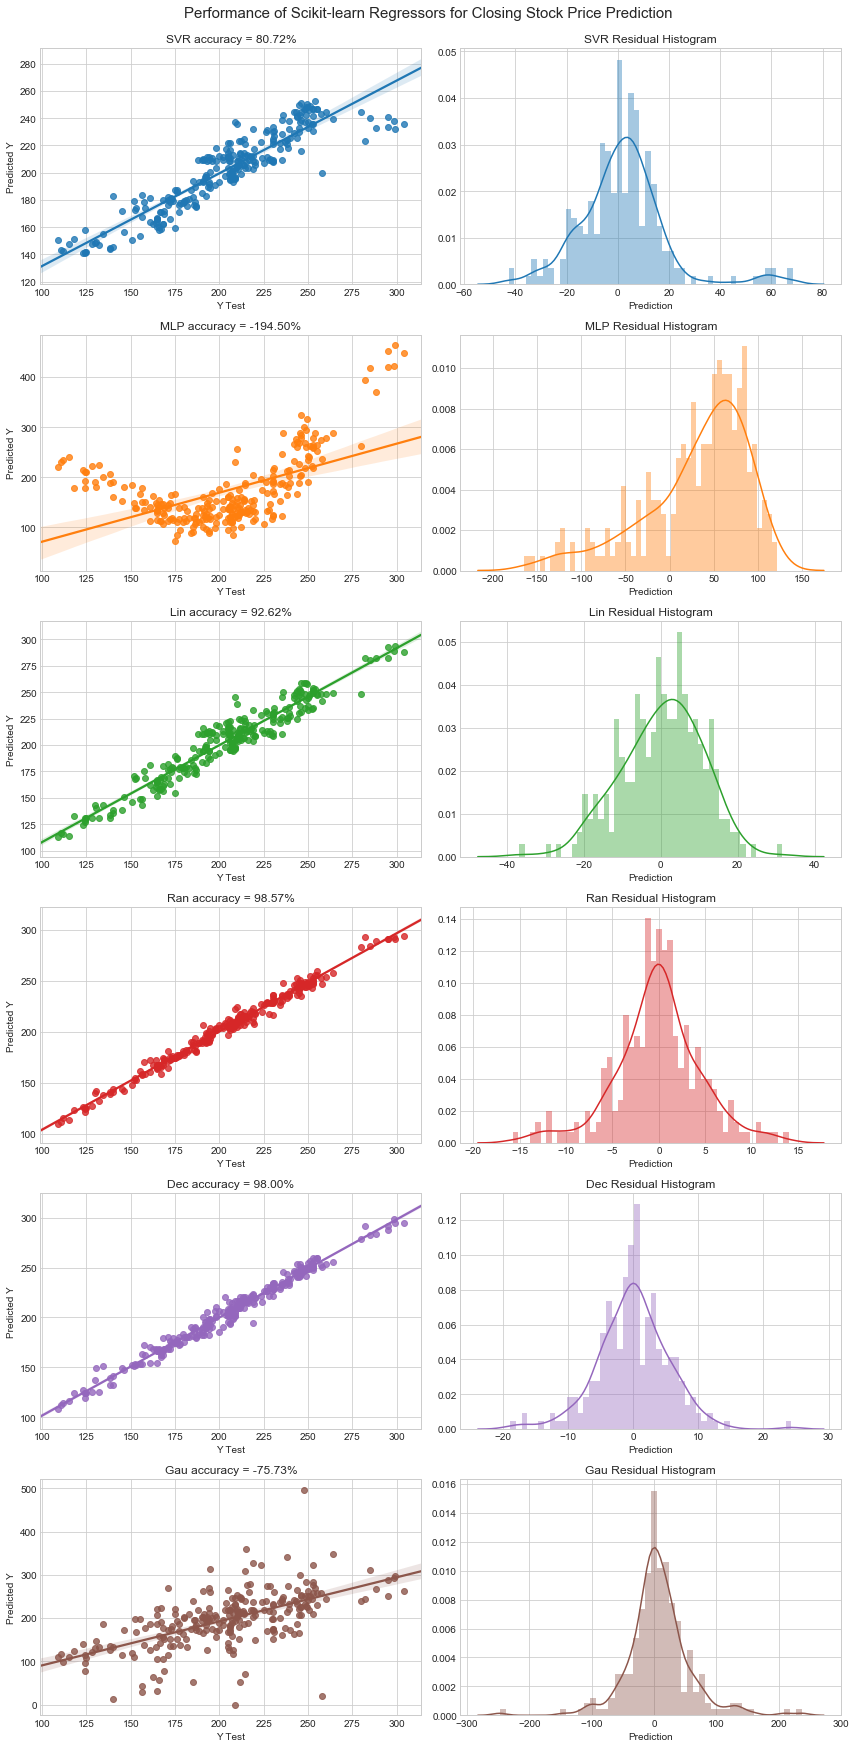

In [93]:
predictors = [SVR(), NNR(), LRR(), RFR(), DTR(), GPR()]

forecast = []
pred_cols = []
accuracy = []

fig, ax = plt.subplots(6,2, figsize=(12,24))

for pred, color, i in zip(predictors, sns.color_palette(), range(len(predictors))):
    pred.fit(X_train, y_train)
    accu = pred.score(X_test,y_test)
    predictions = pred.predict(X_test)
            
    sns.regplot(y_test,predictions, color=color, ax=ax[i,0])
    ax[i,0].set_title('{0} accuracy = {1:.2f}'.format(str(pred)[:3], (accu*100).round(2))+'%')
    ax[i,0].set_xlabel('Y Test')
    ax[i,0].set_ylabel('Predicted Y')
    
    sns.distplot((y_test-predictions), bins=50, color=color, ax=ax[i,1])
    ax[i,1].set_title('{0} Residual Histogram'.format(str(pred)[:3]))
    
    forecast.append(pred.predict(X_predict))
    pred_cols.append(str(pred)[:3])
    accuracy.append('{0} accuracy = {1:.2f}'.format(str(pred)[:3], (accu*100).round(2))+'%')
    
fig.suptitle('Performance of Scikit-learn Regressors for Closing Stock Price Prediction', fontsize=15, y=1.01)
fig.tight_layout()

### Create dataframe for actual forecasts

### Forecasted values

In [94]:
np.array(forecast).shape

(6, 10)

In [95]:
np.array(forecast)

array([[236.98555382, 198.79970702, 230.55645436, 216.56011875,
        227.30779568, 242.86026912, 241.47875377, 227.5070568 ,
        234.83640059, 233.20060214],
       [422.84141851, 434.33626616, 464.39281226, 420.45787232,
        389.2206026 , 414.17533982, 420.46919772, 408.34329764,
        437.29571312, 451.69982431],
       [282.34324614, 299.74299478, 293.28824301, 282.89254304,
        283.89650748, 284.03536631, 284.54373956, 289.08168065,
        289.6009669 , 294.24429784],
       [293.98      , 291.68      , 293.64      , 292.12      ,
        289.2       , 294.06      , 291.78      , 292.82      ,
        296.82      , 292.5       ],
       [294.4       , 288.        , 294.4       , 294.4       ,
        286.8       , 294.4       , 294.4       , 286.8       ,
        294.4       , 288.        ],
       [260.0401376 ,  64.79066347, 292.55503426, 198.47670831,
        309.93455164, 375.3246906 , 311.88224043, 300.44743509,
        341.27221845, 317.91801253]])

In [96]:
regs_forecast = np.array(forecast).transpose()
regs_forecast

array([[236.98555382, 422.84141851, 282.34324614, 293.98      ,
        294.4       , 260.0401376 ],
       [198.79970702, 434.33626616, 299.74299478, 291.68      ,
        288.        ,  64.79066347],
       [230.55645436, 464.39281226, 293.28824301, 293.64      ,
        294.4       , 292.55503426],
       [216.56011875, 420.45787232, 282.89254304, 292.12      ,
        294.4       , 198.47670831],
       [227.30779568, 389.2206026 , 283.89650748, 289.2       ,
        286.8       , 309.93455164],
       [242.86026912, 414.17533982, 284.03536631, 294.06      ,
        294.4       , 375.3246906 ],
       [241.47875377, 420.46919772, 284.54373956, 291.78      ,
        294.4       , 311.88224043],
       [227.5070568 , 408.34329764, 289.08168065, 292.82      ,
        286.8       , 300.44743509],
       [234.83640059, 437.29571312, 289.6009669 , 296.82      ,
        294.4       , 341.27221845],
       [233.20060214, 451.69982431, 294.24429784, 292.5       ,
        288.        , 317.9

### Create datetime index for 10 days that excludes weekends and holidays. 

Business days only, minus holidays.

In [97]:
last_day = stock.index[-1]
last_day

Timestamp('2018-03-28 00:00:00')

In [98]:
last_day = stock.index[-1].to_pydatetime()
last_day

datetime.datetime(2018, 3, 28, 0, 0)

# Exclude these dates since these are Maundy Thursday, Good Friday and Araw ng Kagitingan (National Heroes' Day)

Reference: https://www.stockmarketclock.com/exchanges/pse/market-holidays/2018

(Possible modification: create a web scraper for the holiday dates.)

In [99]:
holiday_dates=pd.DatetimeIndex([pd.to_datetime('2018-03-29'), pd.to_datetime('2018-03-30'), pd.to_datetime('2018-04-09')])
holiday_dates

DatetimeIndex(['2018-03-29', '2018-03-30', '2018-04-09'], dtype='datetime64[ns]', freq=None)

In [100]:
len(holiday_dates)

3

In [101]:
from datetime import datetime, timedelta

In [102]:
forecast_dates = (pd.bdate_range(last_day, periods=((pred_n+1)+len(holiday_dates)))).drop(holiday_dates)
forecast_dates

DatetimeIndex(['2018-03-28', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-16'],
              dtype='datetime64[ns]', freq=None)

In [103]:
accuracy

['SVR accuracy = 80.72%',
 'MLP accuracy = -194.50%',
 'Lin accuracy = 92.62%',
 'Ran accuracy = 98.57%',
 'Dec accuracy = 98.00%',
 'Gau accuracy = -75.73%']

### Create dataframe

In [104]:
regs_stock = pd.DataFrame(data=regs_forecast,
                    index=forecast_dates[1:],
                    columns=accuracy)
regs_stock

SVR accuracy = 80.72%  MLP accuracy = -194.50%  \
2018-04-02             236.985554               422.841419   
2018-04-03             198.799707               434.336266   
2018-04-04             230.556454               464.392812   
2018-04-05             216.560119               420.457872   
2018-04-06             227.307796               389.220603   
2018-04-10             242.860269               414.175340   
2018-04-11             241.478754               420.469198   
2018-04-12             227.507057               408.343298   
2018-04-13             234.836401               437.295713   
2018-04-16             233.200602               451.699824   

            Lin accuracy = 92.62%  Ran accuracy = 98.57%  \
2018-04-02             282.343246                 293.98   
2018-04-03             299.742995                 291.68   
2018-04-04             293.288243                 293.64   
2018-04-05             282.892543                 292.12   
2018-04-06             283.896507                 289.20   
2018-04-10             284.035366                 294.06   
2018-04-11             284.543740                 291.78   
2018-04-12             289.081681                 292.82   
2018-04-13             289.600967                 296.82   
2018-04-16             294.244298                 292.50   

            Dec accuracy = 98.00%  Gau accuracy = -75.73%  
2018-04-02                  294.4              260.040138  
2018-04-03                  288.0               64.790663  
2018-04-04                  294.4              292.555034  
2018-04-05                  294.4              198.476708  
2018-04-06                  286.8              309.934552  
2018-04-10                  294.4              375.324691  
2018-04-11                  294.4              311.882240  
2018-04-12                  286.8              300.447435  
2018-04-13                  294.4              341.272218  
2018-04-16                  288.0              317.918013

### Create forecast link dataframe

Last day of csv dataframe

In [105]:
stock['Close'][-1:]

Date
2018-03-28    299.0
Name: Close, dtype: float64

In [106]:
forecast_rowlink = []
for i in regs_stock.columns:
    forecast_rowlink.append(stock['Close'][-1])
np.array([forecast_rowlink])

array([[299., 299., 299., 299., 299., 299.]])

In [107]:
forecast_link_stock = pd.DataFrame(data=np.array([forecast_rowlink]), 
                                   index=stock.index[-1:], 
                                   columns=accuracy)
forecast_link_stock

SVR accuracy = 80.72%  MLP accuracy = -194.50%  \
Date                                                         
2018-03-28                  299.0                    299.0   

            Lin accuracy = 92.62%  Ran accuracy = 98.57%  \
Date                                                       
2018-03-28                  299.0                  299.0   

            Dec accuracy = 98.00%  Gau accuracy = -75.73%  
Date                                                       
2018-03-28                  299.0                   299.0

# Merge

In [108]:
predic_stock = pd.merge(forecast_link_stock,regs_stock, how='outer').set_index(forecast_dates)
predic_stock

SVR accuracy = 80.72%  MLP accuracy = -194.50%  \
2018-03-28             299.000000               299.000000   
2018-04-02             236.985554               422.841419   
2018-04-03             198.799707               434.336266   
2018-04-04             230.556454               464.392812   
2018-04-05             216.560119               420.457872   
2018-04-06             227.307796               389.220603   
2018-04-10             242.860269               414.175340   
2018-04-11             241.478754               420.469198   
2018-04-12             227.507057               408.343298   
2018-04-13             234.836401               437.295713   
2018-04-16             233.200602               451.699824   

            Lin accuracy = 92.62%  Ran accuracy = 98.57%  \
2018-03-28             299.000000                 299.00   
2018-04-02             282.343246                 293.98   
2018-04-03             299.742995                 291.68   
2018-04-04             293.288243                 293.64   
2018-04-05             282.892543                 292.12   
2018-04-06             283.896507                 289.20   
2018-04-10             284.035366                 294.06   
2018-04-11             284.543740                 291.78   
2018-04-12             289.081681                 292.82   
2018-04-13             289.600967                 296.82   
2018-04-16             294.244298                 292.50   

            Dec accuracy = 98.00%  Gau accuracy = -75.73%  
2018-03-28                  299.0              299.000000  
2018-04-02                  294.4              260.040138  
2018-04-03                  288.0               64.790663  
2018-04-04                  294.4              292.555034  
2018-04-05                  294.4              198.476708  
2018-04-06                  286.8              309.934552  
2018-04-10                  294.4              375.324691  
2018-04-11                  294.4              311.882240  
2018-04-12                  286.8              300.447435  
2018-04-13                  294.4              341.272218  
2018-04-16                  288.0              317.918013

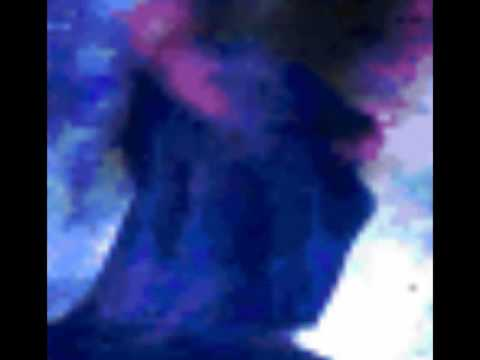

In [109]:
YouTubeVideo("VA41XQMUi-4", start=start, end=end, autoplay=1)

### Concat with actual closing values for final plotting dataframe 

In [110]:
pl_predic_stock = pd.concat([stockC['Close'],predic_stock],axis=1)
pl_predic_stock.rename(columns={'Close': 'Actual Closing Prices'}, inplace=True)
pl_predic_stock

Actual Closing Prices  SVR accuracy = 80.72%  \
2013-01-02                  104.2                    NaN   
2013-01-03                  107.2                    NaN   
2013-01-04                  107.6                    NaN   
2013-01-07                  107.0                    NaN   
2013-01-08                  107.3                    NaN   
2013-01-09                  107.3                    NaN   
2013-01-10                  107.4                    NaN   
2013-01-11                  107.5                    NaN   
2013-01-14                  108.0                    NaN   
2013-01-15                  106.1                    NaN   
2013-01-16                  108.5                    NaN   
2013-01-17                  106.9                    NaN   
2013-01-18                  108.0                    NaN   
2013-01-21                  108.3                    NaN   
2013-01-22                  107.0                    NaN   
2013-01-23                  106.7                    NaN   
2013-01-24                  107.9                    NaN   
2013-01-25                  107.1                    NaN   
2013-01-28                  110.0                    NaN   
2013-01-29                  108.8                    NaN   
2013-01-30                  108.5                    NaN   
2013-01-31                  109.7                    NaN   
2013-02-01                  109.2                    NaN   
2013-02-04                  112.9                    NaN   
2013-02-05                  111.9                    NaN   
2013-02-06                  109.1                    NaN   
2013-02-07                  113.9                    NaN   
2013-02-08                  112.0                    NaN   
2013-02-11                  111.9                    NaN   
2013-02-12                  110.0                    NaN   
...                           ...                    ...   
2018-03-01                  297.6                    NaN   
2018-03-02                  298.0                    NaN   
2018-03-05                  299.6                    NaN   
2018-03-06                  298.6                    NaN   
2018-03-07                  304.0                    NaN   
2018-03-08                  295.0                    NaN   
2018-03-09                  292.0                    NaN   
2018-03-12                  295.4                    NaN   
2018-03-13                  293.0                    NaN   
2018-03-14                  288.4                    NaN   
2018-03-15                  284.0                    NaN   
2018-03-16                  305.4                    NaN   
2018-03-19                  298.0                    NaN   
2018-03-20                  286.0                    NaN   
2018-03-21                  285.0                    NaN   
2018-03-22                  286.8                    NaN   
2018-03-23                  288.0                    NaN   
2018-03-26                  295.0                    NaN   
2018-03-27                  294.4                    NaN   
2018-03-28                  299.0             299.000000   
2018-04-02                    NaN             236.985554   
2018-04-03                    NaN             198.799707   
2018-04-04                    NaN             230.556454   
2018-04-05                    NaN             216.560119   
2018-04-06                    NaN             227.307796   
2018-04-10                    NaN             242.860269   
2018-04-11                    NaN             241.478754   
2018-04-12                    NaN             227.507057   
2018-04-13                    NaN             234.836401   
2018-04-16                    NaN             233.200602   

            MLP accuracy = -194.50%  Lin accuracy = 92.62%  \
2013-01-02                      NaN                    NaN   
2013-01-03                      NaN                    NaN   
2013-01-04                      NaN                    NaN   
2013-01-07                      NaN        

In [111]:
ideal_plots = [pl_predic_stock.columns[0]]+pl_predic_stock.columns[3:-1].tolist()
ideal_plots

['Actual Closing Prices',
 'Lin accuracy = 92.62%',
 'Ran accuracy = 98.57%',
 'Dec accuracy = 98.00%']

### Plot with plotly, again with the previous regressors used.

In [112]:
pl_predic_stock[ideal_plots].iplot(mode='lines+markers', 
                                    title='{0} Predicted Closing Prices from {1} to {2}'.format(label, 
                                                                              str(pl_predic_stock.index[-pred_n])[0:10], 
                                                                              str(pl_predic_stock.index[-1])[0:10]), 
                                    xTitle='\nDate', 
                                    yTitle='Closing Price (₱)\n')